In [25]:
import numpy as np
import sunpy
import sunpy.map
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.io import readsav
from astropy.coordinates import SkyCoord
from datetime import datetime
from astropy.io import fits
from copy import deepcopy
from juanfit import gaussian

In [12]:
with fits.open("../../src/CHASE/20221024/lvl2/fits/RSM20221024T191230_0022_HA.fits") as hdul:
    hdul.info()
    chase_halpha_data = hdul[1].data[:]
    chase_header = deepcopy(hdul[1].header)

Filename: ../../src/CHASE/20221024/lvl2/fits/RSM20221024T191230_0022_HA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2304, 2313)   int16   
  1  COMPRESSED_IMAGE    1 CompImageHDU     49   (2304, 2313, 118)   int16   


In [23]:
sample_spec = np.nanmean(chase_halpha_data[:,:,:], axis=(1,2))
chase_wavelength = (np.arange(chase_header["NAXIS3"]) + 1 - (chase_header["CRPIX3"] + 1))*chase_header["CDELT3"] + chase_header["CRVAL3"]

In [27]:
vbi_halpha_filter = gaussian(chase_wavelength, 6562.82, 1, 0.47)

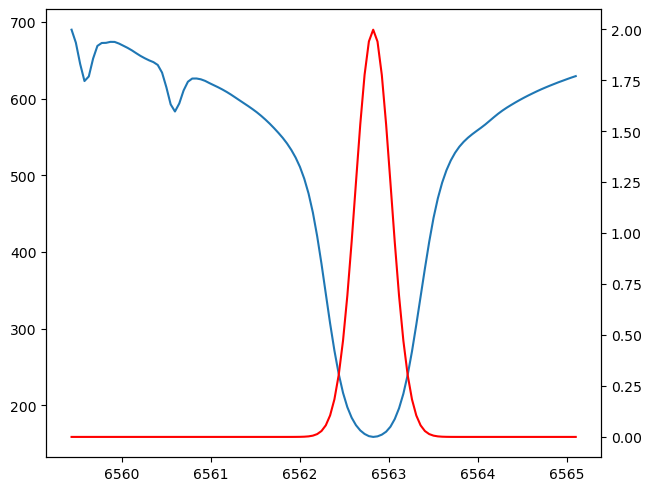

In [28]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(chase_wavelength, sample_spec)
ax_filter = ax.twinx()
ax_filter.plot(chase_wavelength, vbi_halpha_filter, color='red')


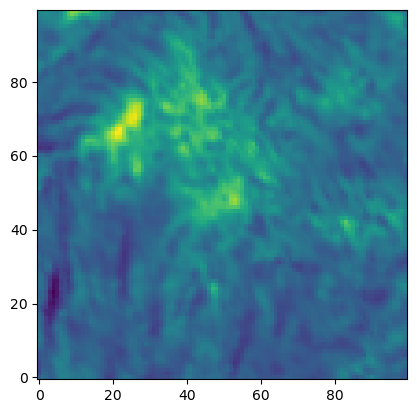

In [19]:
plt.imshow(chase_halpha_data[70,1300:1400,750:850,], origin='lower')

In [38]:
fake_vbi_cut_out = np.nansum(chase_halpha_data[:,1300:1400,750:850,] * vbi_halpha_filter[:, np.newaxis, np.newaxis], axis=0)

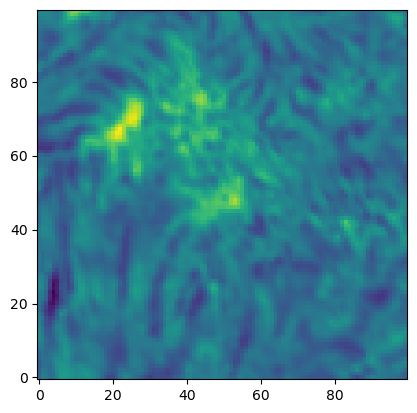

In [39]:
plt.imshow(fake_vbi_cut_out, origin='lower')

In [42]:
def plot_pseudo_vbi_with_shift(chase_halpha_data, vbi_halpha_filter, shift=0):
    vbi_halpha_filter_shifted = gaussian(chase_wavelength, 6562.82 + shift, 1, 0.47)
    fake_vbi_cut_out = np.nansum(chase_halpha_data[:,1300:1400,750:850,] * vbi_halpha_filter_shifted[:, np.newaxis, np.newaxis], axis=0)
    plt.imshow(fake_vbi_cut_out, origin='lower')

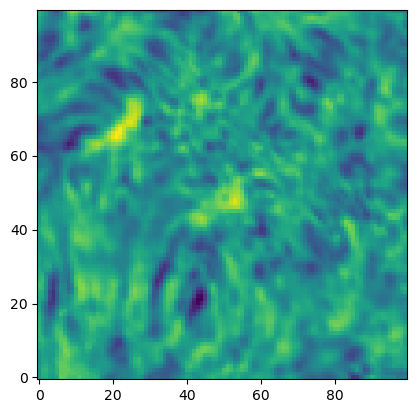

In [56]:
plot_pseudo_vbi_with_shift(chase_halpha_data, vbi_halpha_filter, -0.3)

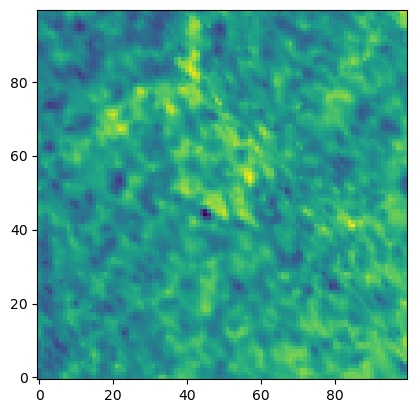

In [20]:
plt.imshow(chase_halpha_data[30,1300:1400,750:850,], origin='lower')